In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/french-bakery-daily-sales/Bakery sales.csv


In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

%matplotlib inline

# Pre Processing and Add Features

In [4]:
df=pd.read_csv('/kaggle/input/french-bakery-daily-sales/Bakery sales.csv')
df

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
...,...,...,...,...,...,...,...
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [43]:
df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [5]:
df.drop(columns='Unnamed: 0',inplace=True)

In [47]:
df

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
...,...,...,...,...,...,...
234000,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [8]:
df.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           234005 non-null  object 
 1   time           234005 non-null  object 
 2   ticket_number  234005 non-null  float64
 3   article        234005 non-null  object 
 4   Quantity       234005 non-null  float64
 5   unit_price     234005 non-null  object 
dtypes: float64(2), object(4)
memory usage: 10.7+ MB


In [6]:
df['datetime'] = df['date'] + ' ' + df['time']
df['datetime'] =  pd.to_datetime(df['datetime'])

In [12]:
df.head()

,date,time,ticket_number,article,Quantity,unit_price,datetime
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",2021-01-02 08:38:00
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",2021-01-02 08:38:00
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",2021-01-02 09:14:00
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",2021-01-02 09:14:00
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",2021-01-02 09:25:00


convert column unit_price to number

In [7]:
df['unit_price'] = df['unit_price'].str.replace('€','')
df['unit_price'] = df['unit_price'].str.replace(',','.')
df['unit_price'] = df['unit_price'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           234005 non-null  object        
 1   time           234005 non-null  object        
 2   ticket_number  234005 non-null  float64       
 3   article        234005 non-null  object        
 4   Quantity       234005 non-null  float64       
 5   unit_price     234005 non-null  float64       
 6   datetime       234005 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 12.5+ MB


In [15]:
df.head()

,date,time,ticket_number,article,Quantity,unit_price,datetime
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,2021-01-02 08:38:00
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,2021-01-02 08:38:00
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,2021-01-02 09:14:00
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,2021-01-02 09:14:00
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,2021-01-02 09:25:00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           234005 non-null  object        
 1   time           234005 non-null  object        
 2   ticket_number  234005 non-null  float64       
 3   article        234005 non-null  object        
 4   Quantity       234005 non-null  float64       
 5   unit_price     234005 non-null  float64       
 6   datetime       234005 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 12.5+ MB


In [8]:
df['total'] = df['Quantity'] * df['unit_price']
df.head()

,date,time,ticket_number,article,Quantity,unit_price,datetime,total
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,2021-01-02 08:38:00,0.90
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,2021-01-02 08:38:00,3.60
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,2021-01-02 09:14:00,2.40
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,2021-01-02 09:14:00,1.15
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,2021-01-02 09:25:00,6.00


In [73]:
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['week'] = df['datetime'].dt.isocalendar().week
df['quarter'] = df['datetime'].dt.quarter
df['weekday'] = df['datetime'].dt.weekday
df['dayname'] = df['datetime'].dt.day_name()
df['year_month_day_hour'] = df['datetime'].dt.to_period('H')
df['year_month_day'] = df['datetime'].dt.to_period('D')
df['year_month'] = df['datetime'].dt.to_period('M')
df['year_week'] = df['datetime'].dt.to_period('W')
df['year_quarter'] = df['datetime'].dt.to_period('Q')

In [82]:
df.head()

,date,time,article,Quantity,unit_price,datetime,total,hour,minute,day,...,year,week,quarter,weekday,dayname,year_month,year_week,year_quarter,year_month_day,year_month_day_hour
0,2021-01-02,08:38,BAGUETTE,1.0,0.90,2021-01-02 08:38:00,0.90,8,38,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 08:00
1,2021-01-02,08:38,PAIN AU CHOCOLAT,3.0,1.20,2021-01-02 08:38:00,3.60,8,38,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 08:00
2,2021-01-02,09:14,PAIN AU CHOCOLAT,2.0,1.20,2021-01-02 09:14:00,2.40,9,14,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 09:00
3,2021-01-02,09:14,PAIN,1.0,1.15,2021-01-02 09:14:00,1.15,9,14,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 09:00
4,2021-01-02,09:25,TRADITIONAL BAGUETTE,5.0,1.20,2021-01-02 09:25:00,6.00,9,25,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 09:00


In [52]:
 df['Quantity']<0

0         False
1         False
2         False
3         False
4         False
          ...  
234000    False
234001    False
234002    False
234003    False
234004    False
Name: Quantity, Length: 234005, dtype: bool

In [81]:
 df[df['Quantity']<0].head(10)

,date,time,article,Quantity,unit_price,datetime,total,hour,minute,day,...,year,week,quarter,weekday,dayname,year_month,year_week,year_quarter,year_month_day,year_month_day_hour
448,2021-01-03,10:41,BAGUETTE,-1.0,0.90,2021-01-03 10:41:00,-0.90,10,41,3,...,2021,53,1,6,Sunday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-03,2021-01-03 10:00
1162,2021-01-05,19:00,SPECIAL BREAD,-1.0,2.40,2021-01-05 19:00:00,-2.40,19,0,5,...,2021,1,1,1,Tuesday,2021-01,2021-01-04/2021-01-10,2021Q1,2021-01-05,2021-01-05 19:00
1163,2021-01-05,19:00,DIVERS PATISSERIE,-1.0,6.00,2021-01-05 19:00:00,-6.00,19,0,5,...,2021,1,1,1,Tuesday,2021-01,2021-01-04/2021-01-10,2021Q1,2021-01-05,2021-01-05 19:00
1164,2021-01-05,19:00,DIVERS BOULANGERIE,-1.0,2.00,2021-01-05 19:00:00,-2.00,19,0,5,...,2021,1,1,1,Tuesday,2021-01,2021-01-04/2021-01-10,2021Q1,2021-01-05,2021-01-05 19:00
1467,2021-01-08,11:58,COUPE,-1.0,0.15,2021-01-08 11:58:00,-0.15,11,58,8,...,2021,1,1,4,Friday,2021-01,2021-01-04/2021-01-10,2021Q1,2021-01-08,2021-01-08 11:00
1468,2021-01-08,11:58,BOULE 400G,-1.0,1.50,2021-01-08 11:58:00,-1.50,11,58,8,...,2021,1,1,4,Friday,2021-01,2021-01-04/2021-01-10,2021Q1,2021-01-08,2021-01-08 11:00
1469,2021-01-08,11:58,CROISSANT,-4.0,1.10,2021-01-08 11:58:00,-4.40,11,58,8,...,2021,1,1,4,Friday,2021-01,2021-01-04/2021-01-10,2021Q1,2021-01-08,2021-01-08 11:00
1470,2021-01-08,11:58,PAIN AU CHOCOLAT,-2.0,1.20,2021-01-08 11:58:00,-2.40,11,58,8,...,2021,1,1,4,Friday,2021-01,2021-01-04/2021-01-10,2021Q1,2021-01-08,2021-01-08 11:00
1845,2021-01-09,13:23,FORMULE SANDWICH,-1.0,6.50,2021-01-09 13:23:00,-6.50,13,23,9,...,2021,1,1,5,Saturday,2021-01,2021-01-04/2021-01-10,2021Q1,2021-01-09,2021-01-09 13:00
2043,2021-01-10,11:43,VIK BREAD,-1.0,2.50,2021-01-10 11:43:00,-2.50,11,43,10,...,2021,1,1,6,Sunday,2021-01,2021-01-04/2021-01-10,2021Q1,2021-01-10,2021-01-10 11:00


Split data into sale and return

In [80]:
df_sale = df[df['Quantity']>0]
df_return = df[df['Quantity']<0]
df.head()

,date,time,article,Quantity,unit_price,datetime,total,hour,minute,day,...,year,week,quarter,weekday,dayname,year_month,year_week,year_quarter,year_month_day,year_month_day_hour
0,2021-01-02,08:38,BAGUETTE,1.0,0.90,2021-01-02 08:38:00,0.90,8,38,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 08:00
1,2021-01-02,08:38,PAIN AU CHOCOLAT,3.0,1.20,2021-01-02 08:38:00,3.60,8,38,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 08:00
2,2021-01-02,09:14,PAIN AU CHOCOLAT,2.0,1.20,2021-01-02 09:14:00,2.40,9,14,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 09:00
3,2021-01-02,09:14,PAIN,1.0,1.15,2021-01-02 09:14:00,1.15,9,14,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 09:00
4,2021-01-02,09:25,TRADITIONAL BAGUETTE,5.0,1.20,2021-01-02 09:25:00,6.00,9,25,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 09:00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           234005 non-null  object        
 1   time           234005 non-null  object        
 2   ticket_number  234005 non-null  float64       
 3   article        234005 non-null  object        
 4   Quantity       234005 non-null  float64       
 5   unit_price     234005 non-null  float64       
 6   datetime       234005 non-null  datetime64[ns]
 7   total          234005 non-null  float64       
 8   hour           234005 non-null  int64         
 9   minute         234005 non-null  int64         
 10  day            234005 non-null  int64         
 11  month          234005 non-null  int64         
 12  year           234005 non-null  int64         
 13  week           234005 non-null  UInt32        
 14  quarter        234005 non-null  int64         
 15  

In [11]:
df.drop(columns='ticket_number',inplace=True)

In [79]:
df.head()

,date,time,article,Quantity,unit_price,datetime,total,hour,minute,day,...,year,week,quarter,weekday,dayname,year_month,year_week,year_quarter,year_month_day,year_month_day_hour
0,2021-01-02,08:38,BAGUETTE,1.0,0.90,2021-01-02 08:38:00,0.90,8,38,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 08:00
1,2021-01-02,08:38,PAIN AU CHOCOLAT,3.0,1.20,2021-01-02 08:38:00,3.60,8,38,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 08:00
2,2021-01-02,09:14,PAIN AU CHOCOLAT,2.0,1.20,2021-01-02 09:14:00,2.40,9,14,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 09:00
3,2021-01-02,09:14,PAIN,1.0,1.15,2021-01-02 09:14:00,1.15,9,14,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 09:00
4,2021-01-02,09:25,TRADITIONAL BAGUETTE,5.0,1.20,2021-01-02 09:25:00,6.00,9,25,2,...,2021,53,1,5,Saturday,2021-01,2020-12-28/2021-01-03,2021Q1,2021-01-02,2021-01-02 09:00


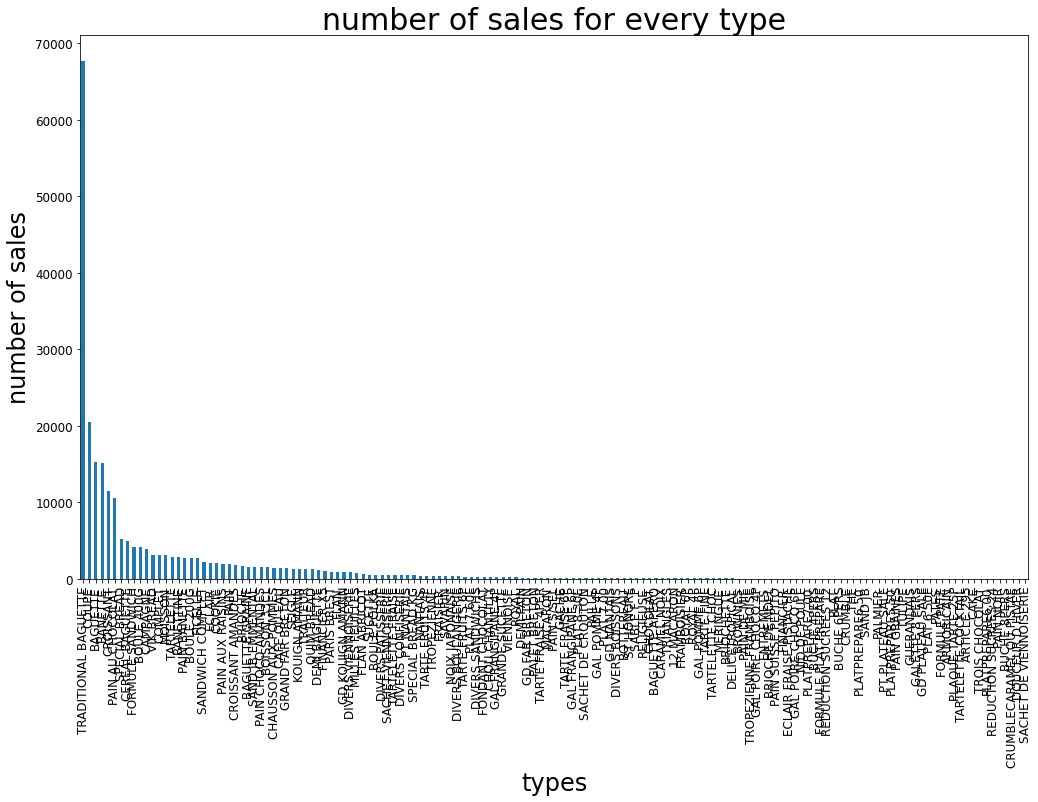

In [12]:
df['article'].value_counts().plot(kind='bar',figsize=(17,10),fontsize=12)
plt.xlabel('types',fontsize=24)
plt.ylabel('number of sales',fontsize=24)
plt.title('number of sales for every type',fontsize=30)
plt.show()

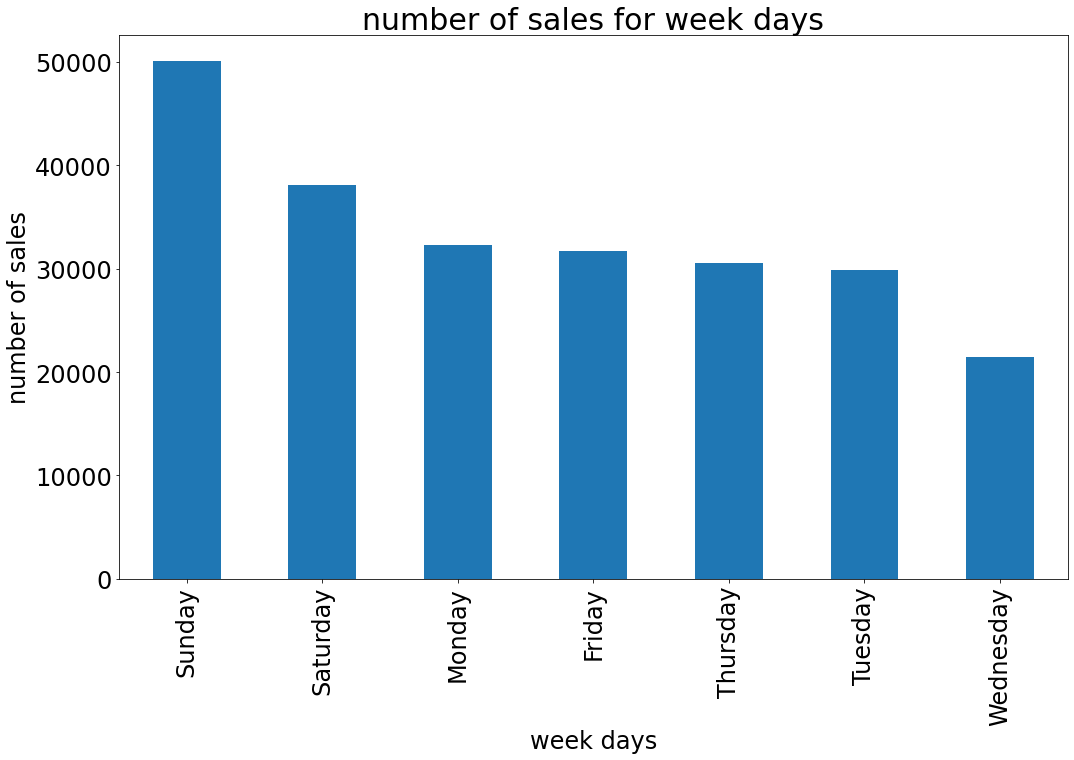

In [13]:
df['dayname'].value_counts().plot(kind='bar',figsize=(17,10),fontsize=24)
plt.xlabel('week days',fontsize=24)
plt.ylabel('number of sales',fontsize=24)
plt.title('number of sales for week days',fontsize=30)
plt.show()

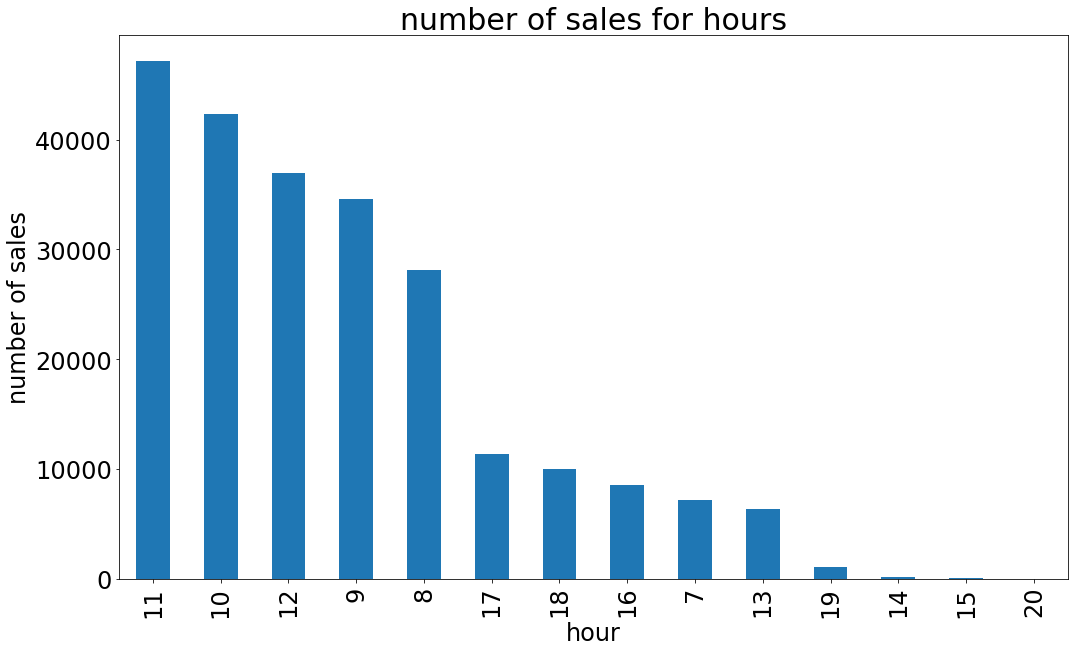

In [78]:

df['hour'].value_counts().plot(kind='bar',figsize=(17,10),fontsize=24)
plt.xlabel('hour',fontsize=24)
plt.ylabel('number of sales',fontsize=24)
plt.title('number of sales for hours',fontsize=30)
plt.show()

# Sales Analysis

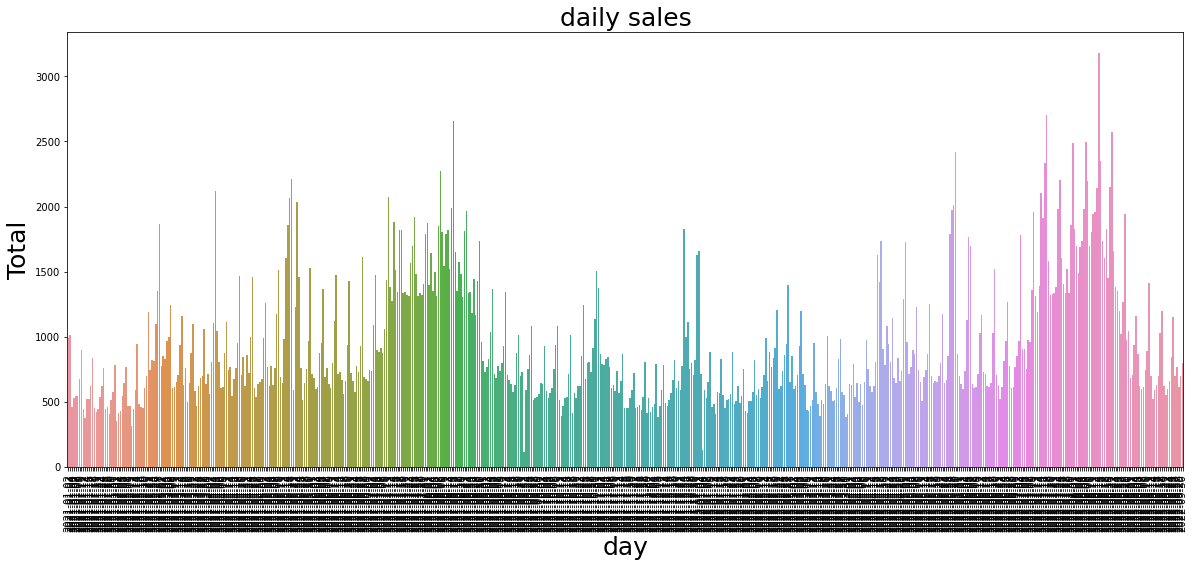

In [66]:
df_daily_total = df_sale.groupby('date', as_index=False)['total'].sum()

plt.figure(figsize = (20,8))
ax = sns.barplot(data=df_daily_total, x='date', y='total')
plt.xlabel('day',fontsize=25)
plt.ylabel('Total',fontsize=25)
plt.title('daily sales',fontsize=25)
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

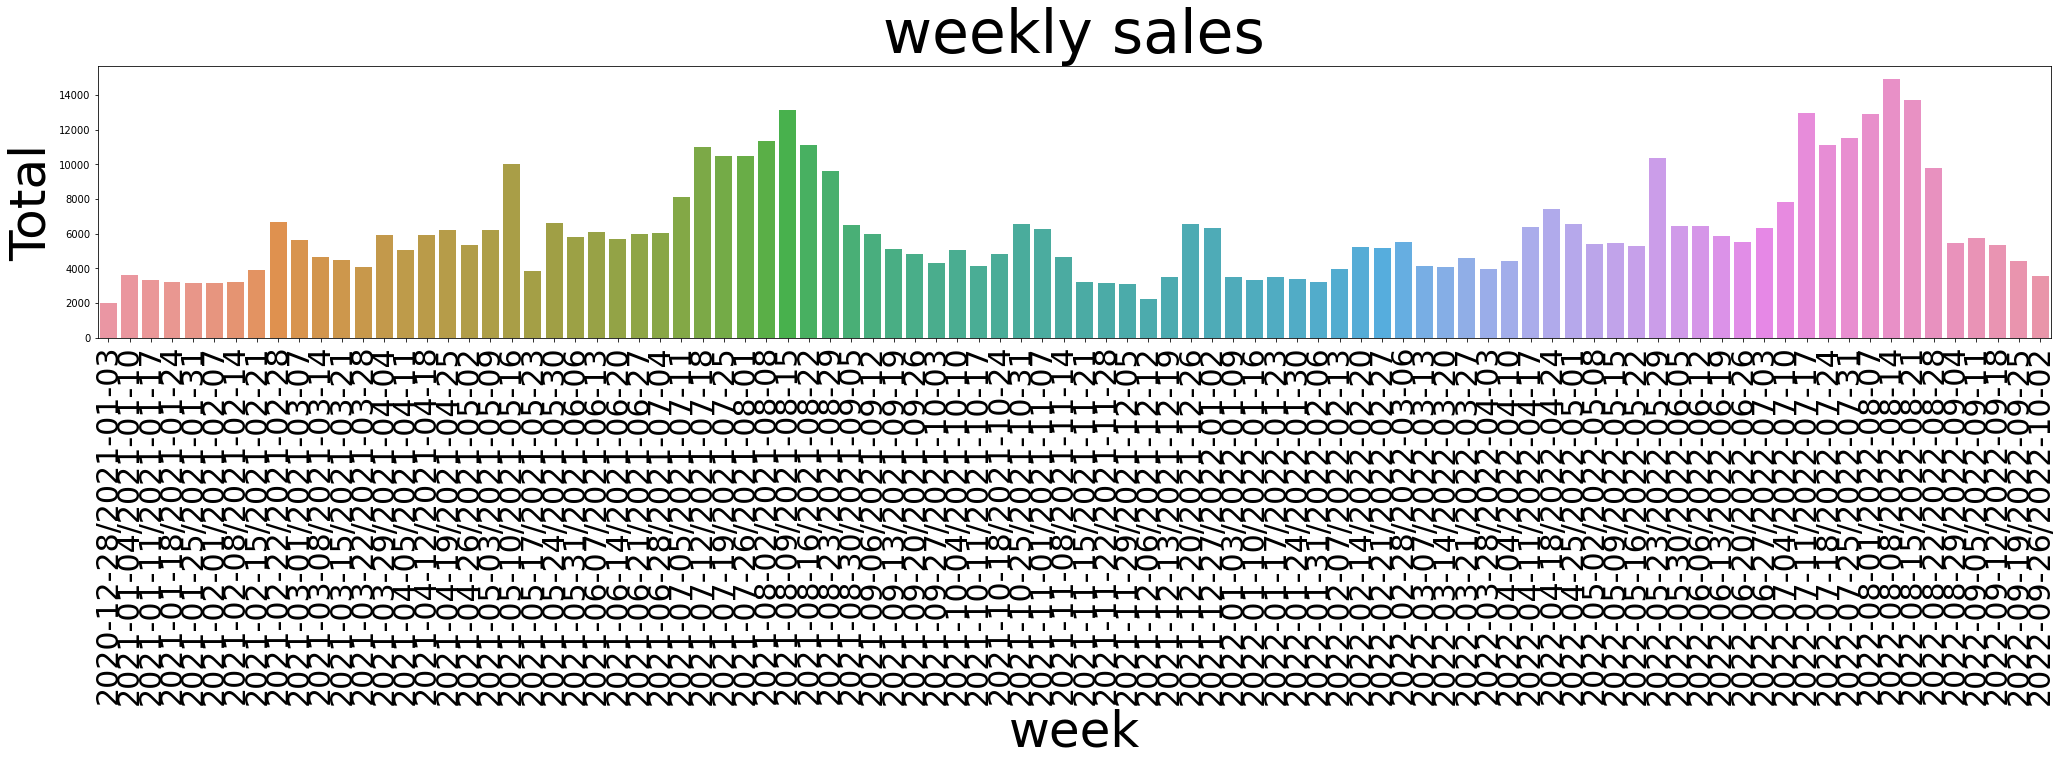

In [54]:
a=df_sale.groupby(['year_week'])['total'].sum().reset_index()
plt.figure(figsize=(35,5))
ax=sns.barplot(data=a,x='year_week',y='total')
plt.xlabel('week',fontsize=50)
plt.ylabel('Total',fontsize=50)
plt.title('weekly sales',fontsize=60)
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=30)
plt.show()

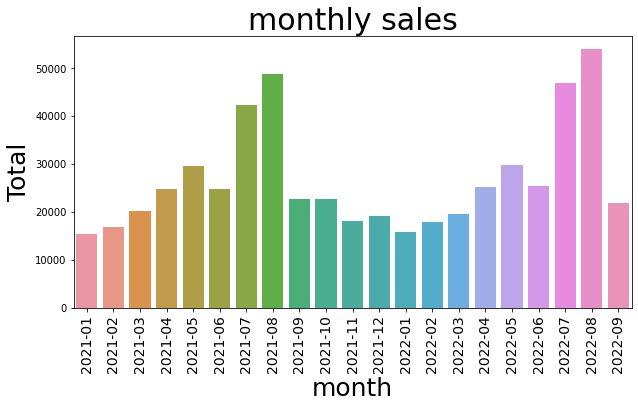

In [52]:
a=df_sale.groupby(['year_month'])['total'].sum().reset_index()
plt.figure(figsize=(10,5))
ax=sns.barplot(data=a,x='year_month',y='total')
plt.xlabel('month',fontsize=25)
plt.ylabel('Total',fontsize=25)
plt.title('monthly sales',fontsize=30)
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=14)
plt.show()

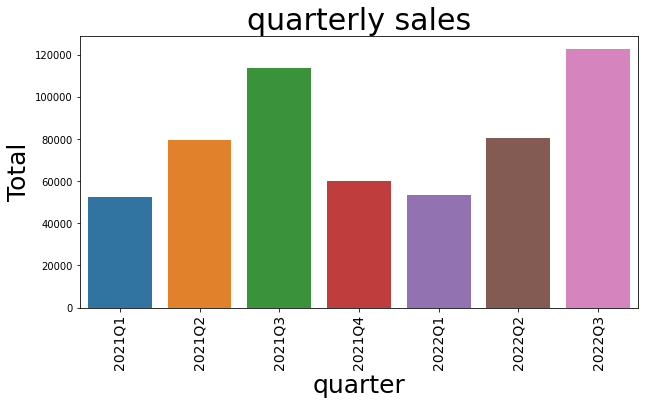

In [53]:
a=df_sale.groupby(['year_quarter'])['total'].sum().reset_index()
plt.figure(figsize=(10,5))
ax=sns.barplot(data=a,x='year_quarter',y='total')
plt.xlabel('quarter',fontsize=25)
plt.ylabel('Total',fontsize=25)
plt.title('quarterly sales',fontsize=30)
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=14)
plt.show()

In [36]:
df['total'].describe()

count    234005.000000
mean          2.387303
std           2.635041
min        -200.000000
25%           1.200000
50%           1.600000
75%           2.600000
max         200.000000
Name: total, dtype: float64

# Top 5 articles sales (quantity)

In [39]:
df_sale.groupby('article',as_index=False)['Quantity'].sum().sort_values('Quantity',ascending=False).head(5)

,article,Quantity
140,TRADITIONAL BAGUETTE,118093.0
32,CROISSANT,29822.0
85,PAIN AU CHOCOLAT,25367.0
31,COUPE,23601.0
7,BANETTE,22870.0


# Top 5 sales amount by article

In [40]:
df_sale.groupby(['article'], as_index=False)['total'].sum().sort_values('total', ascending=False).head(5)

,article,total
140,TRADITIONAL BAGUETTE,145533.75
57,FORMULE SANDWICH,35419.50
32,CROISSANT,33770.45
85,PAIN AU CHOCOLAT,31262.15
7,BANETTE,24704.30


# Return Analysis

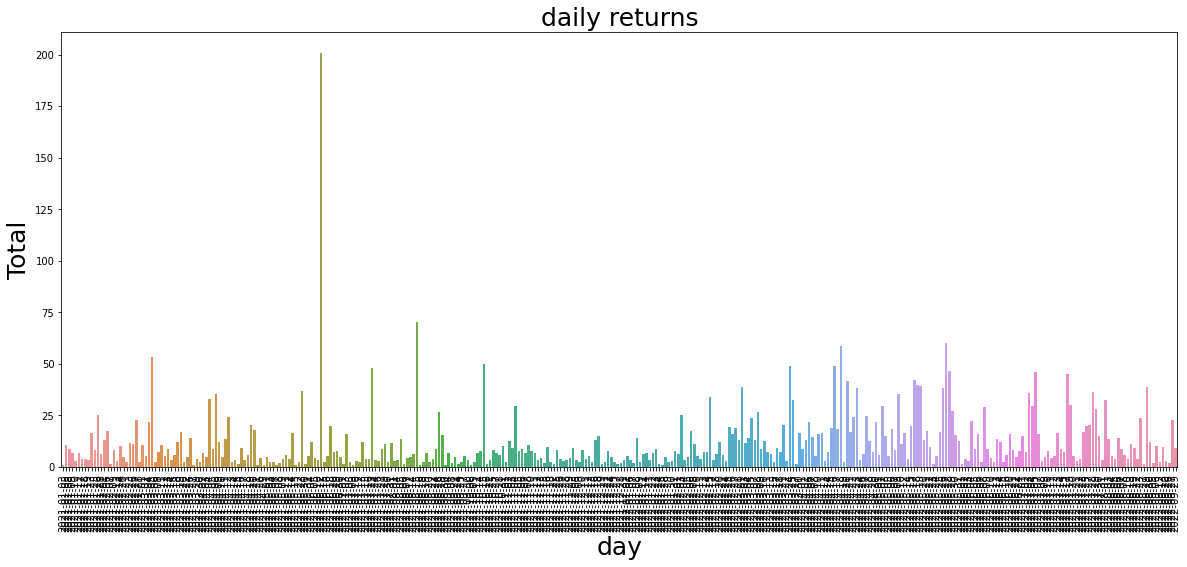

In [69]:
df_daily_total = df_return.groupby('date', as_index=False)['total'].sum()
df_daily_total['total'] = df_daily_total['total'] * -1
plt.figure(figsize = (20,8))
ax = sns.barplot(data=df_daily_total, x='date', y='total')
plt.xlabel('day',fontsize=25)
plt.ylabel('Total',fontsize=25)
plt.title('daily returns',fontsize=25)
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

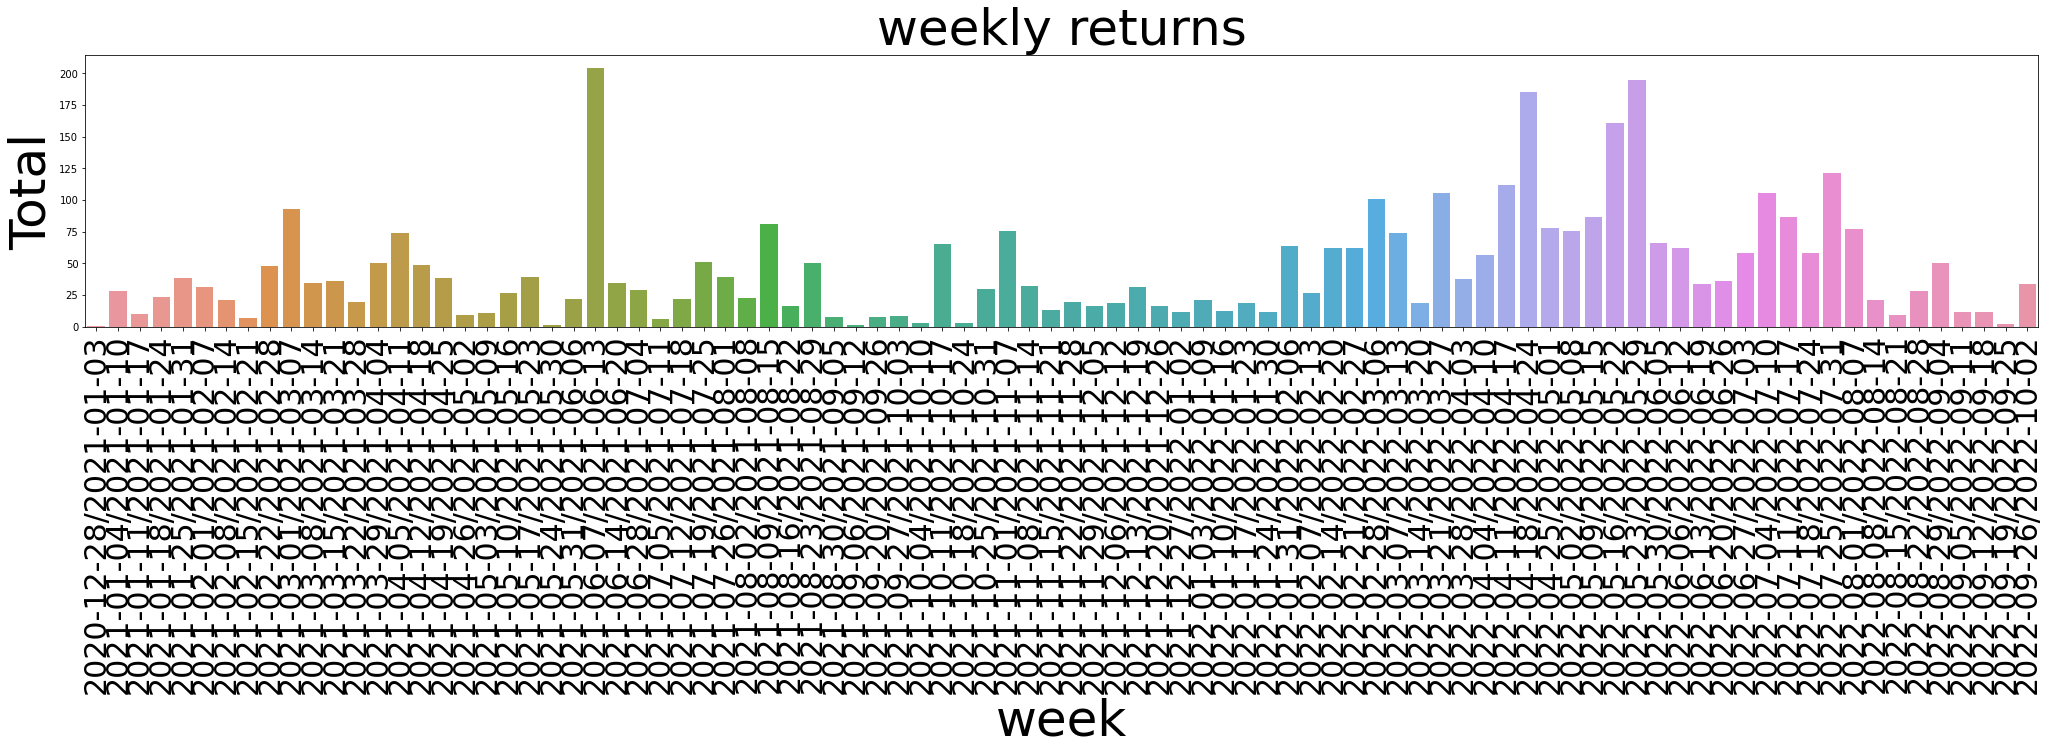

In [55]:
a=df_return.groupby(['year_week'])['total'].sum().reset_index()
a['total'] = a['total'] * -1
plt.figure(figsize=(35,5))
ax=sns.barplot(data=a,x='year_week',y='total')
plt.xlabel('week',fontsize=50)
plt.ylabel('Total',fontsize=50)
plt.title('weekly returns',fontsize=50)
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=30)
plt.show()

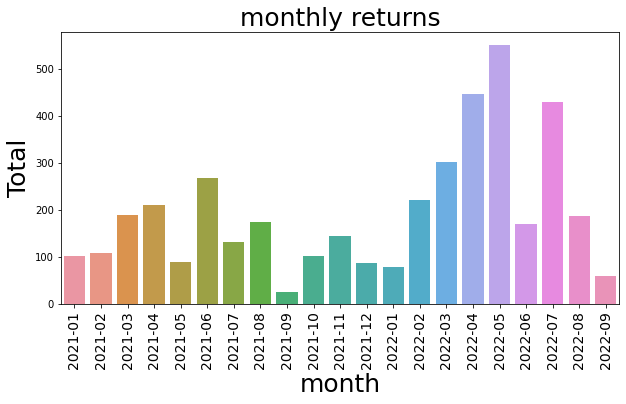

In [56]:
a=df_return.groupby(['year_month'])['total'].sum().reset_index()
a['total'] = a['total'] * -1
plt.figure(figsize=(10,5))
ax=sns.barplot(data=a,x='year_month',y='total')
plt.xlabel('month',fontsize=25)
plt.ylabel('Total',fontsize=25)
plt.title('monthly returns',fontsize=25)
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=14)
plt.show()

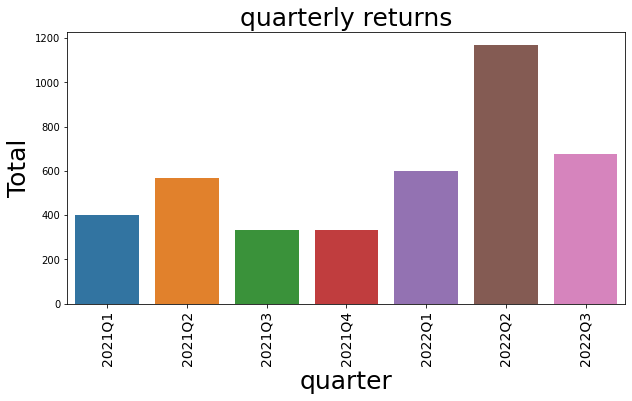

In [57]:
a=df_return.groupby(['year_quarter'])['total'].sum().reset_index()
a['total'] = a['total'] * -1
plt.figure(figsize=(10,5))
ax=sns.barplot(data=a,x='year_quarter',y='total')
plt.xlabel('quarter',fontsize=25)
plt.ylabel('Total',fontsize=25)
plt.title('quarterly returns',fontsize=25)
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=14)
plt.show()

# Top 5 articles return (quantity)

In [50]:
df_return.groupby('article', as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=True).head(5)

,article,Quantity
76,TRADITIONAL BAGUETTE,-630.0
11,CAFE OU EAU,-211.0
18,CROISSANT,-168.0
3,BANETTE,-138.0
46,PAIN AU CHOCOLAT,-131.0


# Top 5 return amount by article

In [48]:
df_return.groupby(['article'], as_index=False)['total'].sum().sort_values('total', ascending=True).head(5)

,article,total
76,TRADITIONAL BAGUETTE,-777.70
32,FORMULE SANDWICH,-709.00
11,CAFE OU EAU,-211.00
18,CROISSANT,-190.95
46,PAIN AU CHOCOLAT,-161.70


# Prediction total amount sales monthly

In [119]:
d['day'] = d['year_month_day'].dt.day
d['month'] = d['year_month_day'].dt.month
d['year'] = d['year_month_day'].dt.year
d['quarter'] = d['year_month_day'].dt.quarter
d['weekday'] = d['year_month_day'].dt.weekday

In [120]:
d = df_sale

In [121]:
d=pd.get_dummies(data=d)
d.head()

,Quantity,unit_price,datetime,total,hour,minute,day,month,year,week,...,article_TULIPE,article_VIENNOISE,article_VIK BREAD,dayname_Friday,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday
0,1.0,0.90,2021-01-02 08:38:00,0.90,8,38,2,1,2021,53,...,0,0,0,0,0,1,0,0,0,0
1,3.0,1.20,2021-01-02 08:38:00,3.60,8,38,2,1,2021,53,...,0,0,0,0,0,1,0,0,0,0
2,2.0,1.20,2021-01-02 09:14:00,2.40,9,14,2,1,2021,53,...,0,0,0,0,0,1,0,0,0,0
3,1.0,1.15,2021-01-02 09:14:00,1.15,9,14,2,1,2021,53,...,0,0,0,0,0,1,0,0,0,0
4,5.0,1.20,2021-01-02 09:25:00,6.00,9,25,2,1,2021,53,...,0,0,0,0,0,1,0,0,0,0


In [109]:
d.dtypes

Quantity                    float64
unit_price                  float64
datetime             datetime64[ns]
total                       float64
hour                          int64
                          ...      
dayname_Saturday              uint8
dayname_Sunday                uint8
dayname_Thursday              uint8
dayname_Tuesday               uint8
dayname_Wednesday             uint8
Length: 1456, dtype: object

In [311]:
d = df_sale.groupby('month', as_index=False)['total'].sum()
d.head()

,month,total
0,1,31123.27
1,2,34782.30
2,3,39926.61
3,4,49980.35
4,5,59543.30


In [312]:
d=pd.get_dummies(data=d)
d

,month,total
0,1,31123.27
1,2,34782.30
2,3,39926.61
3,4,49980.35
4,5,59543.30
5,6,50334.30
6,7,89360.67
7,8,102898.15
8,9,44635.95
9,10,22806.00


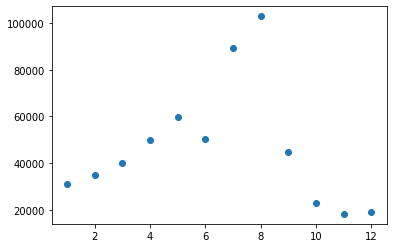

In [313]:
plt.scatter(d['month'],d['total'])

In [94]:
d.dtypes

year_month_day    period[D]
total               float64
day                   int64
month                 int64
year                  int64
quarter               int64
weekday               int64
dtype: object

In [314]:
x = d.drop('total', axis=1)
y = d['total']

In [145]:
x

,month
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [146]:
y

0      31123.27
1      34782.30
2      39926.61
3      49980.35
4      59543.30
5      50334.30
6      89360.67
7     102898.15
8      44635.95
9      22806.00
10     18188.40
11     19137.40
Name: total, dtype: float64

In [315]:
x_train, x_test, y_train, y_test = train_test_split(d, y, test_size=0.2, shuffle=False, random_state=42)

In [316]:
x_test

,month,total
9,10,22806.0
10,11,18188.4
11,12,19137.4


In [243]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [327]:
model=PolynomialFeatures(degree=10)
x_model=model.fit_transform(x)

In [328]:
pilreg=LinearRegression()
pilreg.fit(x_model,y)

LinearRegression()

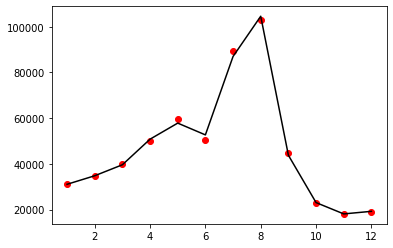

In [329]:
plt.scatter(d['month'],d['total'],color='r')
plt.plot(x,pilreg.predict(model.fit_transform(x)),color='k')

In [330]:
y_predicted=pilreg.predict(x_model)
y_predicted

array([ 31087.42020826,  34824.13329607,  39626.23505262,  50815.8399319 ,
        57841.46765264,  52693.66038745,  86985.03911012, 104566.65329021,
        43778.56845516,  23088.64836162,  18138.65791362,  19270.37626689])

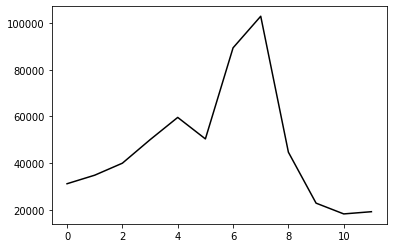

In [331]:
plt.plot(y,color='k')

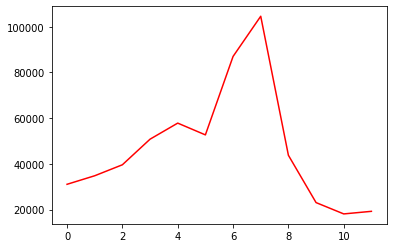

In [332]:


plt.plot(y_predicted,color='r')
